In [1]:
# Librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo CSV
df_original = pd.read_csv('list_attr_celeba.csv')

In [3]:
# Visualizar las primeras filas del DataFrame
print(df_original.head())

     image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  We

In [4]:
# Mostrar información sobre el DataFrame (tipos de datos, cantidad de datos, etc.)
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

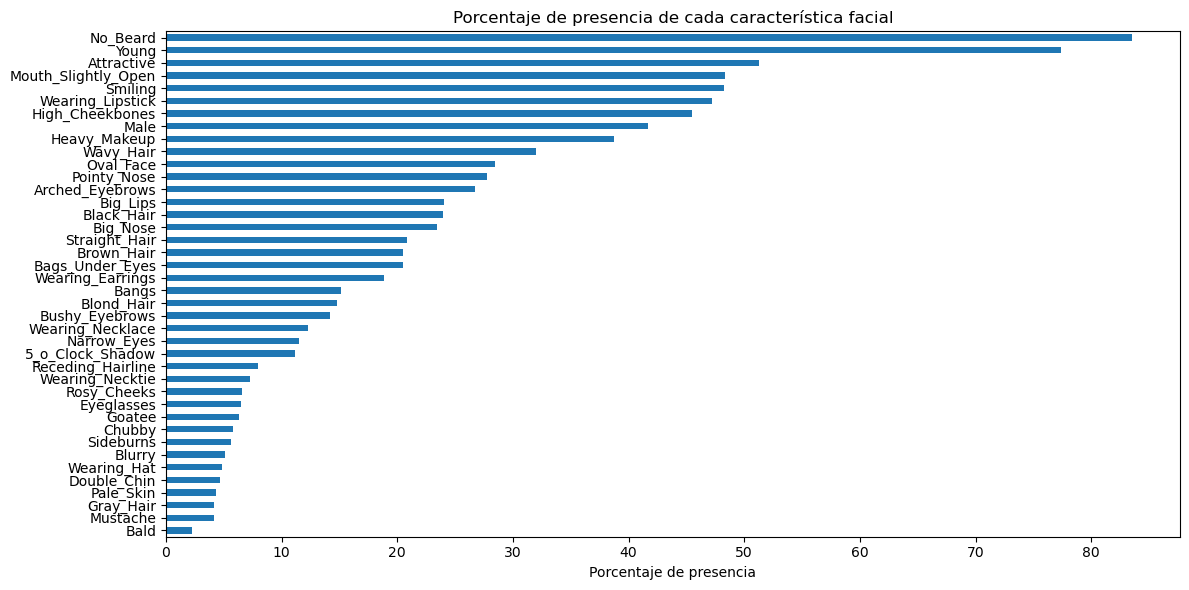

In [5]:
# Calcular el porcentaje de presencia de cada característica
presence_percentages = df_original.drop(columns=['image_id']).apply(lambda x: (x == 1).mean() * 100)

# Visualizar el porcentaje de presencia de cada característica
plt.figure(figsize=(12, 6))
presence_percentages.sort_values().plot(kind='barh')
plt.xlabel('Porcentaje de presencia')
plt.title('Porcentaje de presencia de cada característica facial')
plt.tight_layout()
plt.show()

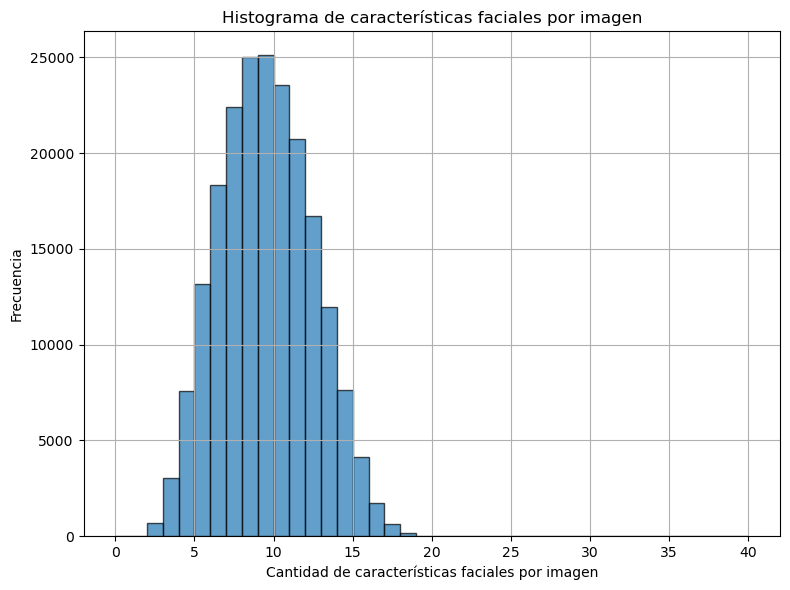

In [8]:
# Histograma de características por imagen
df_original['total_features'] = df_original.drop(columns=['image_id']).apply(lambda x: (x == 1).sum(), axis=1)
plt.figure(figsize=(8, 6))
plt.hist(df_original['total_features'], bins=range(0, 41), edgecolor='black', alpha=0.7)
plt.xlabel('Cantidad de características faciales por imagen')
plt.ylabel('Frecuencia')
plt.title('Histograma de características faciales por imagen')
plt.grid(True)
plt.tight_layout()
plt.show()

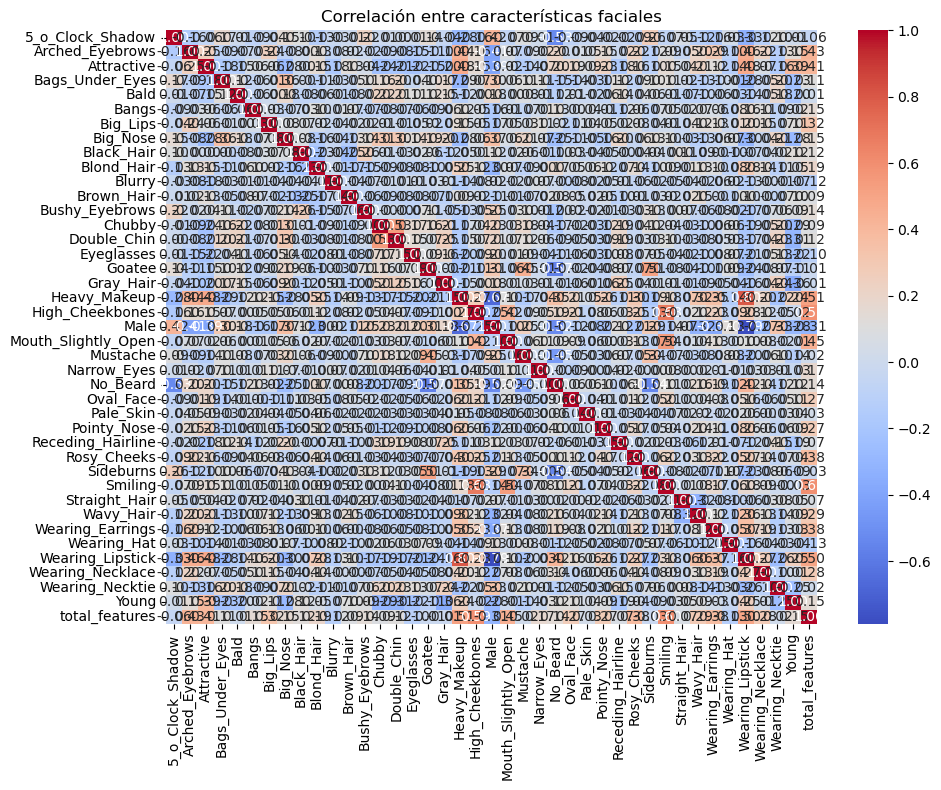

In [9]:
# Análisis de patrones
plt.figure(figsize=(10, 8))
sns.heatmap(df_original.drop(columns=['image_id']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre características faciales')
plt.tight_layout()
plt.show()

## Razones para eliminar las siguientes 10 columnas del dataset

- **Attractive (Atractivo(a)):** Se eliminó porque la atracción física es subjetiva y puede variar según la percepción individual, lo que podría no ser relevante para identificar a personas desaparecidas.
- **Blurry (Borroso(a)):** Eliminado porque indica la calidad de la imagen y no características físicas de la persona. En un contexto de identificación facial, es más importante centrarse en rasgos físicos claros y distintivos.
- **Heavy_Makeup (Maquillaje pesado):** Eliminado porque el maquillaje pesado puede ser temporal y no proporcionar información útil para la identificación a largo plazo de una persona. Además, el maquillaje puede ser fácilmente cambiado o retirado.
- **Mouth_Slightly_Open (Boca ligeramente abierta):** Eliminado porque la apertura ligeramente de la boca es una característica dinámica que puede no ser útil para la identificación facial. Además, muchas imágenes de personas pueden tener la boca ligeramente abierta debido a la expresión facial natural.
- **Smiling (Sonriendo):** Eliminado porque la sonrisa es una expresión facial dinámica y puede no ser útil para la identificación facial. Además, las personas pueden tener diferentes expresiones faciales en diferentes momentos y situaciones.
- **Wearing_Earrings (Usando aretes):** Eliminado porque el uso de aretes es una característica de vestimenta que puede variar fácilmente y no proporcionar información útil para la identificación a largo plazo de una persona.
- **Wearing_Hat (Usando sombrero):** Eliminado porque el uso de sombrero puede ser temporal y no proporcionar información útil para la identificación a largo plazo de una persona.
- **Wearing_Lipstick (Usando lápiz labial):** Eliminado porque el uso de lápiz labial también puede ser temporal y no necesariamente una característica distintiva de una persona para propósitos de identificación.
- **Wearing_Necklace (Usando collar):** Eliminado porque el uso de collar es una característica que puede cambiar fácilmente y no proporcionar información útil para la identificación a largo plazo.
- **Wearing_Necktie (Usando corbata):** Eliminado porque el uso de corbata es una característica de vestimenta que puede variar dependiendo del contexto y no es necesariamente útil para la identificación facial.

In [10]:
# Lista de columnas a eliminar
columnas_eliminar = ['Attractive', 'Blurry', 'Heavy_Makeup', 'Mouth_Slightly_Open', 
                     'Smiling', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 
                     'Wearing_Necklace', 'Wearing_Necktie']

# Eliminar las columnas
df_nuevo = df_original.drop(columns=columnas_eliminar)

# Guardar el nuevo dataset en un nuevo archivo CSV
df_nuevo.to_csv('list_attr_celeba_limpio.csv', index=False)